# PCA 

### 1. PCA란? 
- input변수들을 보면 보통 무작위의 서로 다른 변수가 아니라 <B>특정한 규칙을 가지는 경우가 대부분</B>인데, 이러한 데이터들간의 특정한 규칙을 찾기 위해 PCA를 이용할 수 있음   
   (ex. iris 데이터, 키와 몸무게는 양의상관관계 등) 
   
- PCA(Principal Component Analysis) :   
주성분 분석이라고도 하며, 위에서 이야기한 특정한 규칙을 찾아 <B>고차원 데이터를 가장 비슷하면서도 낮은 차원의 데이터로 바꿀 수 있는 방법을 찾는 과정</B>이며 따라서 차원숙소(dimention reduction)이라고도 함  

In [14]:
plt.rc('font', family='NanumGothic') # For Windows

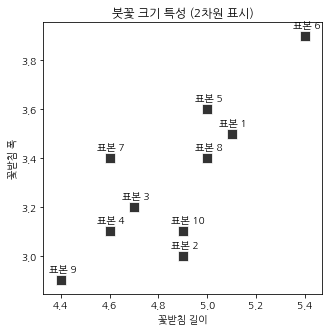

In [16]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings(action='ignore')
iris = load_iris()
N = 10  # 앞의 10송이만 선택
X = iris.data[:N, :2]  # 꽃받침 길이와 꽃받침 폭만 선택
plt.figure(figsize=(5, 5))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, "표본 {}".format(i + 1))
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("붓꽃 크기 특성 (2차원 표시)")
plt.axis("equal")
plt.show()

- 위 그림과 같이, 붓꽃 데이터의 2가지 변수 모두 꽃의 크기를 나타내는 변수이기 때문에 유사한 패턴을 보이게 되며, 이와 같이 측정 데이터를 결정짓는 데이터(기저 안에 숨겨져 있는)를 <U><B>잠재변수(latent variable)</B></U>이라고 함 

- PCA에서는 잠재변수와 측정 데이터가 선형적인 관계로 연결되어 있다고 가정함. 
  - 선형변화 : 특정 벡터에(input) 행렬 W를 곱해 새로운 벡터로 변환하는 것을 의미 

#### 2) PCA 계산 방법 

- 입력 데이터의 공분산 행렬을 통해 고유값 분해를 통해 공유벡터를 구하게 됨(변동성이 가장 큰 방향) 
- 이 고유벡터를 활용(고유값이 가장 큰 순으로 K개)하여 입력데이터를 선형 변환함 

### 2. SKLEARN PCA 

#### 1) 입력 인수:
- n_components : 정수

#### 2) 메서드:
- fit_transform() : 특징행렬을 낮은 차원의 근사행렬로 변환
- inverse_transform() : 변환된 근사행렬을 원래의 차원으로 복귀

#### 3) 속성:
- mean_ : 평균 벡터
- components_ : 주성분 벡터

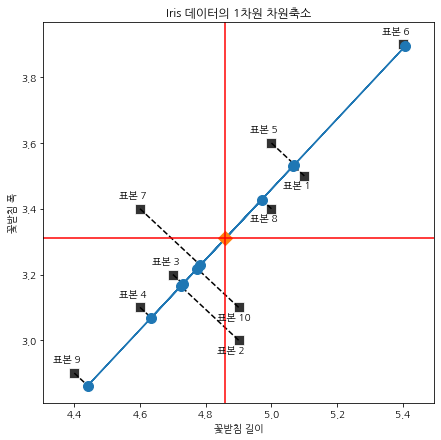

In [18]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "표본 {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("Iris 데이터의 1차원 차원축소")
plt.axis("equal")
plt.show()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\ljieu\scikit_learn_data


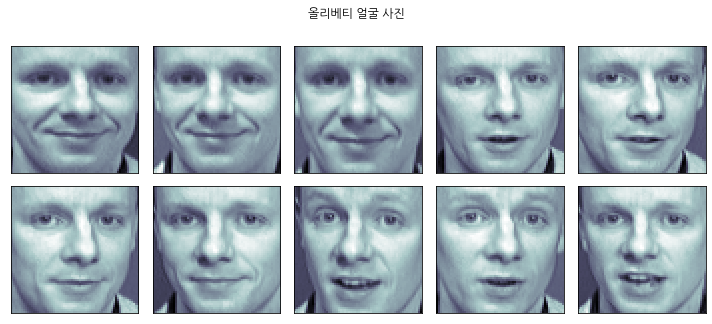

In [19]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
K = 20  # 20번 인물의 사진만 선택
faces = faces_all.images[faces_all.target == K]

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

In [20]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=2)
X3 = faces_all.data[faces_all.target == K]
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)

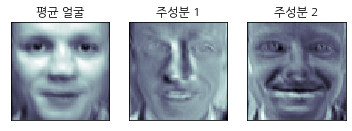

In [21]:
face_mean = pca3.mean_.reshape(64, 64)
face_p1 = pca3.components_[0].reshape(64, 64)
face_p2 = pca3.components_[1].reshape(64, 64)

plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("평균 얼굴")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 1")
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 2")
plt.show()